/var/folders/p1/ln4t56c16x161n1vbyx_xpt40000gn/T/ipykernel_75672/3212254682.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('checkpoints/gan16_be

Checkpoint keys: dict_keys(['epoch', 'gan_state_dict', 'optimizer_G_state_dict', 'optimizer_D_state_dict', 'loss_D', 'loss_G'])
Error loading checkpoint: Error(s) in loading state_dict for Generator16:
	Missing key(s) in state_dict: "main.0.weight", "main.0.bias", "main.1.weight", "main.1.bias", "main.1.running_mean", "main.1.running_var", "main.3.weight", "main.3.bias", "main.4.weight", "main.4.bias", "main.4.running_mean", "main.4.running_var", "main.6.weight", "main.6.bias", "main.7.weight", "main.7.bias", "main.7.running_mean", "main.7.running_var", "main.9.weight", "main.9.bias", "main.10.weight", "main.10.bias", "main.10.running_mean", "main.10.running_var", "main.12.weight", "main.12.bias". 
	Unexpected key(s) in state_dict: "epoch", "gan_state_dict", "optimizer_G_state_dict", "optimizer_D_state_dict", "loss_D", "loss_G". 
Available keys: dict_keys(['epoch', 'gan_state_dict', 'optimizer_G_state_dict', 'optimizer_D_state_dict', 'loss_D', 'loss_G'])


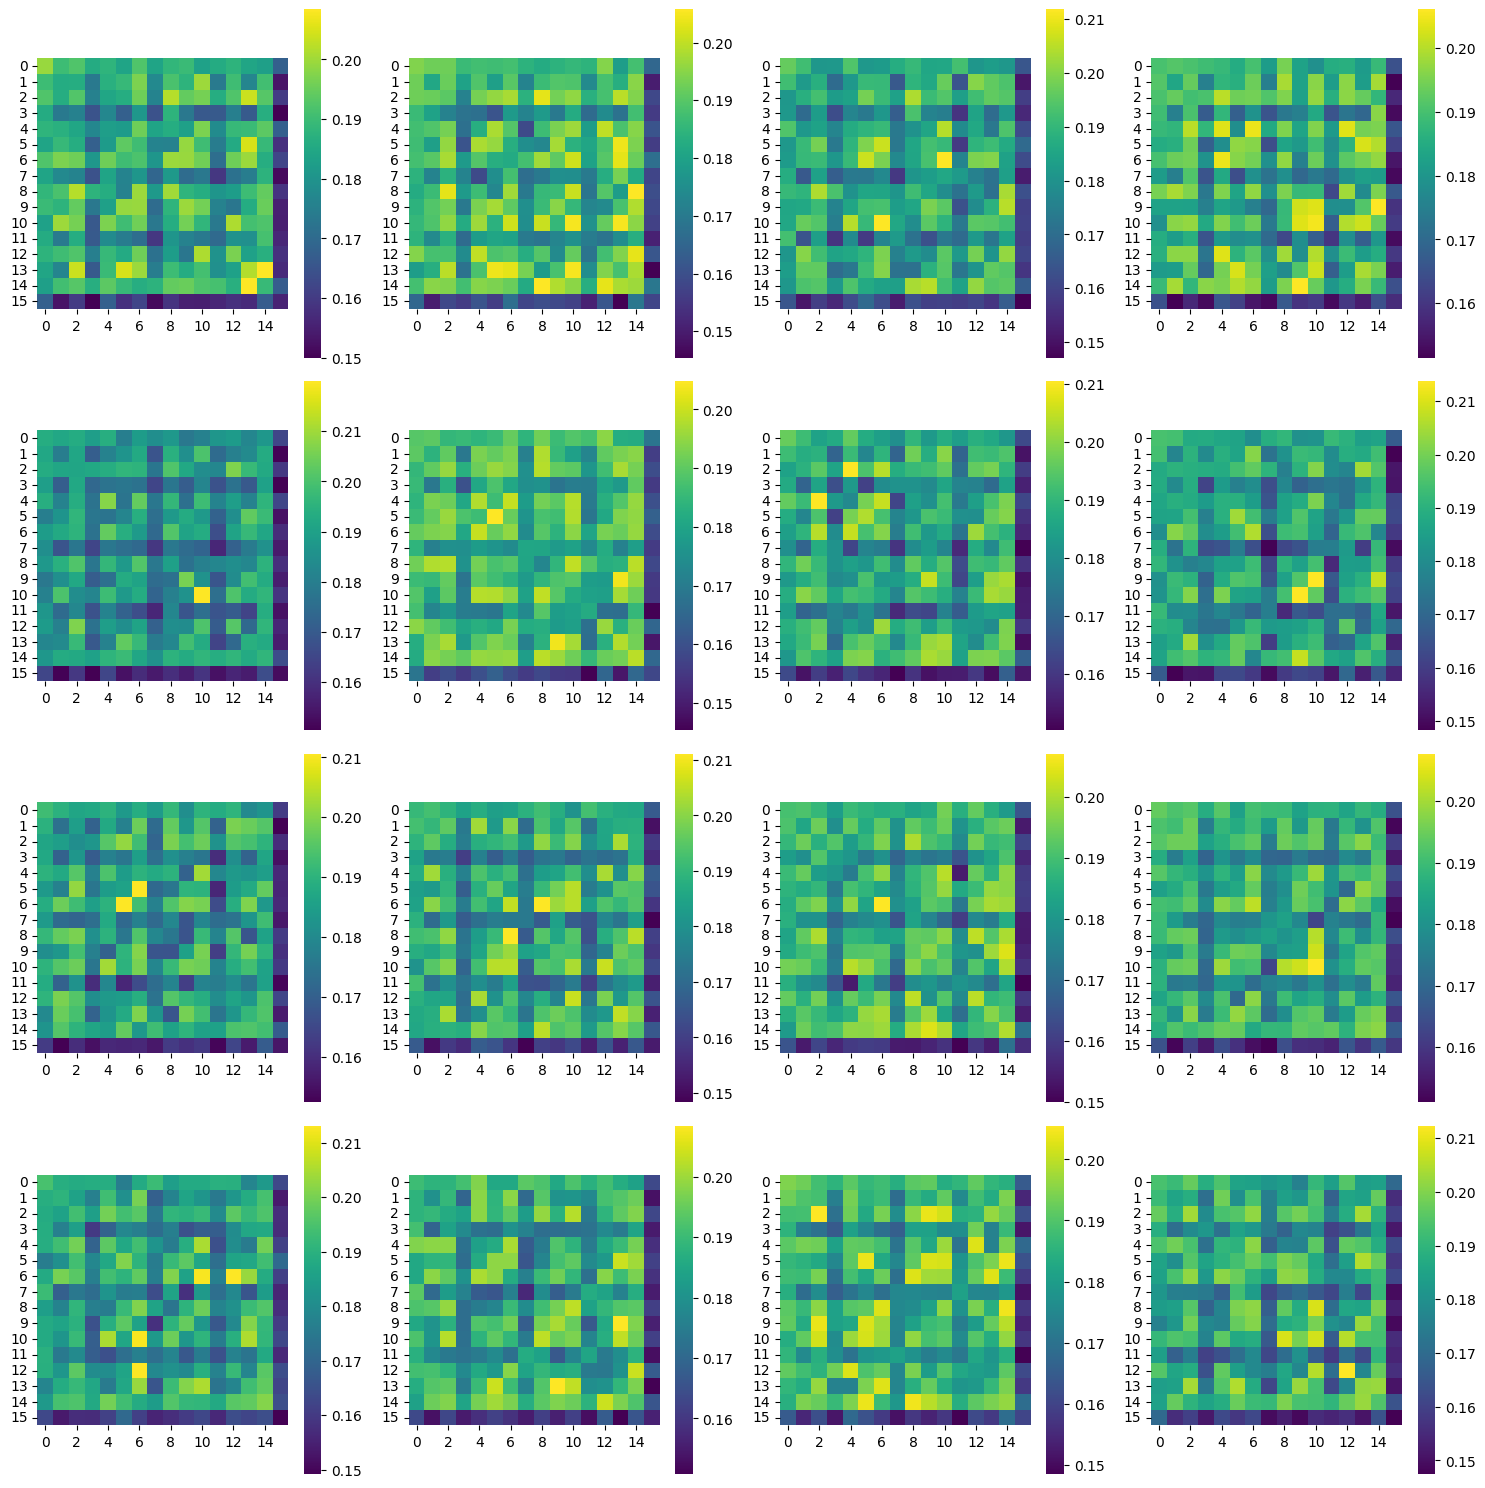

In [1]:
# evaluation.ipynb
import torch
from models.gans import Generator16
import matplotlib.pyplot as plt
import seaborn as sns

# Load model
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
checkpoint = torch.load('checkpoints/gan16_best.pt', map_location=device)

# Debug: Let's see what's in the checkpoint
print("Checkpoint keys:", checkpoint.keys())

# Generator config for 16-residue fragments
latent_dim = 100
G = Generator16(nz=latent_dim).to(device)

# Adjust loading based on checkpoint structure
# Try these alternatives based on what you see in checkpoint.keys():
try:
    if 'generator_state_dict' in checkpoint:
        G.load_state_dict(checkpoint['generator_state_dict'])
    elif 'generator' in checkpoint:
        G.load_state_dict(checkpoint['generator'])
    elif 'state_dict' in checkpoint:
        G.load_state_dict(checkpoint['state_dict'])
    else:
        # If the checkpoint is just the state dict itself
        G.load_state_dict(checkpoint)
except Exception as e:
    print(f"Error loading checkpoint: {e}")
    print("Available keys:", checkpoint.keys())

G.eval()

# Generate samples
@torch.no_grad()
def generate_samples(n_samples=16):
    z = torch.randn(n_samples, latent_dim, 1, 1).to(device)  # Note the (1,1) for conv input
    samples = G(z)
    return samples.squeeze(1)  # Remove channel dimension for visualization

# Visualize as grid
def plot_heatmap_grid(samples, n_rows=4, n_cols=4):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
    for i in range(n_rows):
        for j in range(n_cols):
            idx = i * n_cols + j
            sns.heatmap(samples[idx].cpu().numpy(), 
                       ax=axes[i,j], 
                       cmap='viridis',
                       square=True)  # Ensure square aspect ratio
    plt.tight_layout()
    return fig

# Test it
samples = generate_samples(16)
fig = plot_heatmap_grid(samples)
plt.show()